# Hypothesis 3

Certain airlines may have been better equipped to handle snowstorms and minimize cancellation rates and reduce average delays compared to others


In [2]:
from sql_functions import get_dataframe

### Get flights table from SQL

In [3]:
schema = 'hh_analytics_24_1'

sql_query_2 = f'SELECT flight_date, airline, dep_delay, arr_delay, cancelled, diverted, origin, dest FROM {schema}.flights_group_x'
flights = get_dataframe(sql_query_2)

flights.head(20)
flights.tail(20)

,flight_date,airline,dep_delay,arr_delay,cancelled,diverted,origin,dest
50116,2010-02-28,US,0.0,0.0,0,0,PHX,JFK
50117,2010-02-01,WN,-2.0,-15.0,0,0,BWI,LGA
50118,2010-02-01,WN,9.0,37.0,0,0,BWI,LGA
50119,2010-02-01,WN,-5.0,-7.0,0,0,BWI,LGA
50120,2010-02-01,WN,5.0,-16.0,0,0,LGA,BWI
50121,2010-02-01,WN,-4.0,-42.0,0,0,LGA,BWI
50122,2010-02-01,WN,15.0,-16.0,0,0,LGA,BWI
50123,2010-02-01,WN,-2.0,-38.0,0,0,LGA,MDW
50124,2010-02-01,WN,36.0,1.0,0,0,LGA,MDW
50125,2010-02-01,WN,-3.0,-43.0,0,0,LGA,MDW


In [4]:
# Sort the DataFrame by flight_date
flights_sorted = flights.sort_values(by='flight_date')

# Filter rows where flight_date is between start_date and end_date
start_date = '2010-02-01'
end_date = '2010-02-17'
flights_filtered = flights_sorted[(flights_sorted['flight_date'] >= start_date) & (flights_sorted['flight_date'] <= end_date)]

# Display the filtered DataFrame
flights_filtered.tail(20)  # Display last 20 rows


,flight_date,airline,dep_delay,arr_delay,cancelled,diverted,origin,dest
43379,2010-02-17,OH,-5.0,-18.0,0,0,BNA,JFK
43411,2010-02-17,OH,0.0,-14.0,0,0,PWM,JFK
43374,2010-02-17,OH,0.0,32.0,0,0,BNA,JFK
43381,2010-02-17,OH,22.0,51.0,0,0,RDU,JFK
43389,2010-02-17,OH,0.0,-45.0,0,0,ROC,JFK
43388,2010-02-17,OH,-4.0,11.0,0,0,JFK,BNA
43387,2010-02-17,OH,0.0,21.0,0,0,JFK,DTW
12904,2010-02-17,AA,-2.0,-1.0,0,0,ORD,LGA
43386,2010-02-17,OH,22.0,-2.0,0,0,JFK,CMH
43380,2010-02-17,OH,92.0,70.0,0,0,JFK,BDL


### Calculate and plot cancellation rate for the 3 highest and lowest performing airlines

/var/folders/8y/rwvh8l2506v7ctg86sx8xq2r0000gn/T/ipykernel_1396/2248788909.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_filtered['flight_date'] = pd.to_datetime(flights['flight_date'])


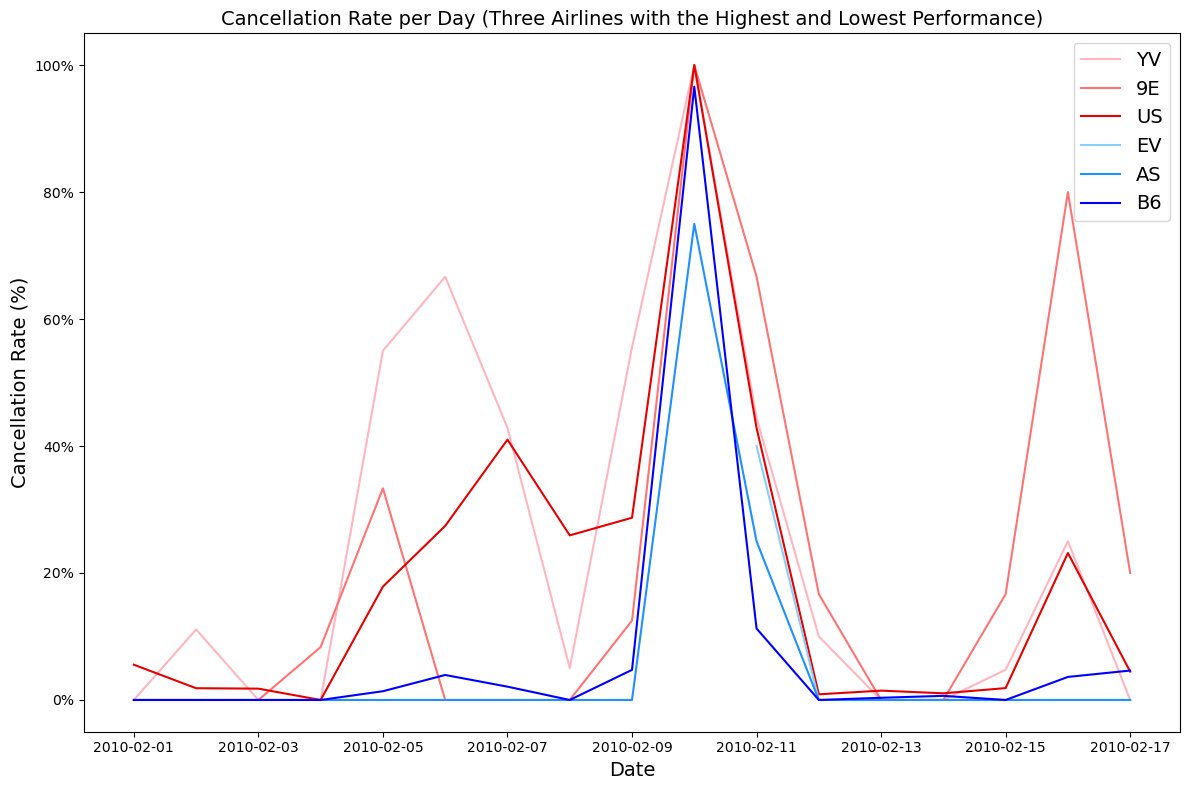

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df contains your DataFrame with the given snippet of data

# Convert 'flight_date' to datetime format
flights_filtered['flight_date'] = pd.to_datetime(flights['flight_date'])

# Group by 'flight_date' and 'airline', then count the number of cancelled flights and total flights
cancelled_flights = flights_filtered.groupby(['flight_date', 'airline'])['cancelled'].sum().reset_index(name='cancelled_count')
total_flights = flights_filtered.groupby(['flight_date', 'airline']).size().reset_index(name='total_flights')

# Merge cancelled_flights and total_flights DataFrames to calculate cancellation rate
merged_df = pd.merge(cancelled_flights, total_flights, on=['flight_date', 'airline'])

# Calculate cancellation rate
merged_df['cancellation_rate'] = merged_df['cancelled_count'] / merged_df['total_flights']

# Calculate cancellation rate per day for each airline
cancellation_rate_per_day = merged_df.groupby(['flight_date', 'airline'])['cancellation_rate'].mean().reset_index()

# Sort by cancellation rate
sorted_cancellation_rate = cancellation_rate_per_day.groupby('airline')['cancellation_rate'].mean().reset_index()
top_3_airlines = sorted_cancellation_rate.sort_values(by='cancellation_rate', ascending=False).head(3)['airline'] # three highest cancellation rates
bottom_3_airlines = sorted_cancellation_rate.sort_values(by='cancellation_rate').head(3)['airline'] # three lowest cancellation rates

# Filter cancellation rate per day DataFrame for top 3 and bottom 3 airlines
top_3_cancellation_rate = cancellation_rate_per_day[cancellation_rate_per_day['airline'].isin(top_3_airlines)]
bottom_3_cancellation_rate = cancellation_rate_per_day[cancellation_rate_per_day['airline'].isin(bottom_3_airlines)]

# Define custom colors for top and bottom airlines
top_colors = ['#FFB6C1', '#FF7373', '#E60000']
bottom_colors = ['#87CEFA', '#1E90FF', '#0000FF']  # Blue shades

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot for top 3 airlines with custom colors
for i, airline in enumerate(top_3_airlines):
    data = top_3_cancellation_rate[top_3_cancellation_rate['airline'] == airline]
    ax.plot(data['flight_date'], data['cancellation_rate'] * 100, label=airline, color=top_colors[i])

# Plot for bottom 3 airlines with custom colors
for i, airline in enumerate(bottom_3_airlines):
    data = bottom_3_cancellation_rate[bottom_3_cancellation_rate['airline'] == airline]
    ax.plot(data['flight_date'], data['cancellation_rate'] * 100, label=airline, color=bottom_colors[i])

ax.set_title('Cancellation Rate per Day (Three Airlines with the Highest and Lowest Performance)', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Cancellation Rate (%)', fontsize=14)  # Update ylabel to indicate percentage
ax.legend(fontsize=14)

# Update y-axis ticks to represent percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x / 100)))
ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()


### Calculate and plot average arrival delay for the 3 highest and lowest performing airlines

/var/folders/8y/rwvh8l2506v7ctg86sx8xq2r0000gn/T/ipykernel_1396/4252832151.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_filtered['flight_date'] = pd.to_datetime(flights['flight_date'])


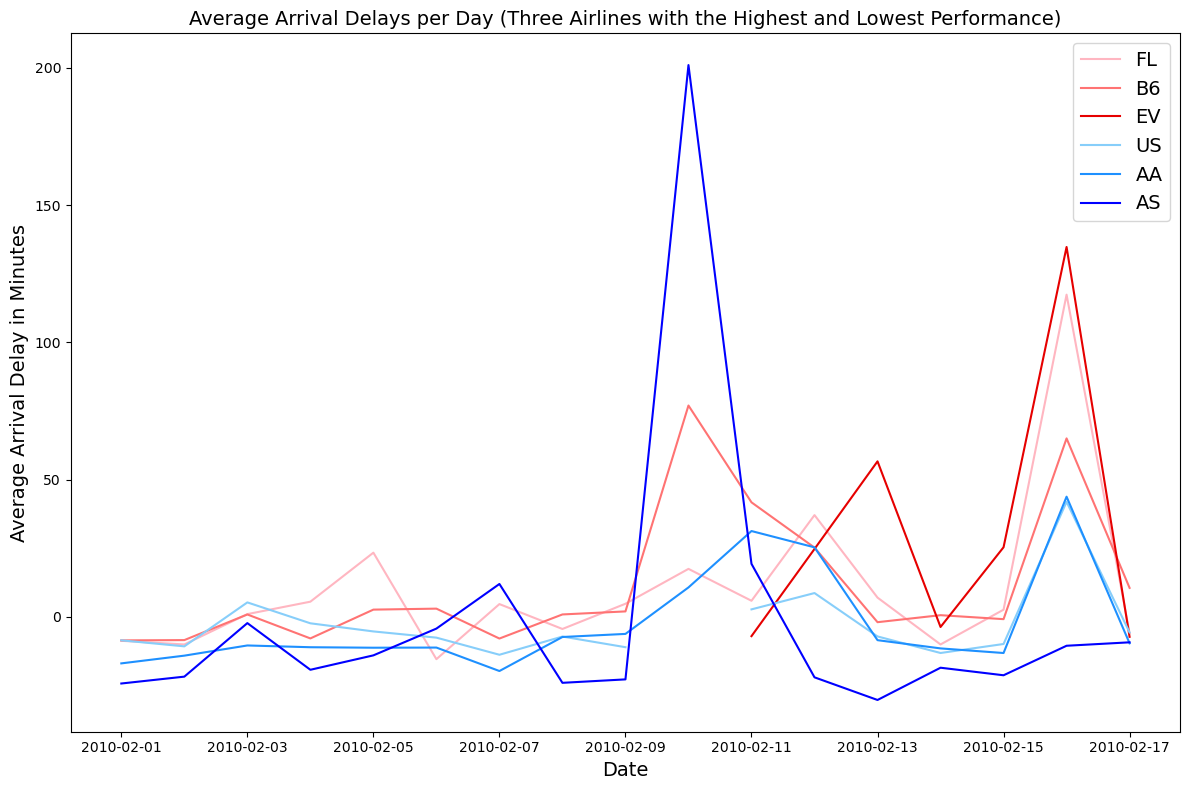

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df contains your DataFrame with the given snippet of data

# Convert 'flight_date' to datetime format
flights_filtered['flight_date'] = pd.to_datetime(flights['flight_date'])

# Group by 'flight_date' and 'airline', then sum the arrival delays
arr_delay_mean = flights_filtered.groupby(['flight_date', 'airline'])['arr_delay'].mean().reset_index()

# Calculate total arrival delays per airline
total_arr_delay = arr_delay_mean.groupby('airline')['arr_delay'].mean().reset_index()

# Sort by total arrival delays
total_arr_delay_sorted = total_arr_delay.sort_values(by='arr_delay')

# Get top 3 and bottom 3 airlines by total arrival delays
top_3_airlines = total_arr_delay_sorted.tail(3)['airline']
bottom_3_airlines = total_arr_delay_sorted.head(3)['airline']

# Filter arrival delays DataFrame for top 3 and bottom 3 airlines
top_3_arr_delay = arr_delay_mean[arr_delay_mean['airline'].isin(top_3_airlines)]
bottom_3_arr_delay = arr_delay_mean[arr_delay_mean['airline'].isin(bottom_3_airlines)]

# Define custom colors for each airline
top_colors = ['#FFB6C1', '#FF7373', '#E60000']  # Customize as needed
bottom_colors = ['#87CEFA', '#1E90FF', '#0000FF']  # Blue shades

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot for top 3 airlines with custom colors
for i, airline in enumerate(top_3_airlines):
    data = top_3_arr_delay[top_3_arr_delay['airline'] == airline]
    ax.plot(data['flight_date'], data['arr_delay'], label=airline, color=top_colors[i])

# Plot for bottom 3 airlines with custom colors
for i, airline in enumerate(bottom_3_airlines):
    data = bottom_3_arr_delay[bottom_3_arr_delay['airline'] == airline]
    ax.plot(data['flight_date'], data['arr_delay'], label=airline, color=bottom_colors[i])

ax.set_title('Average Arrival Delays per Day (Three Airlines with the Highest and Lowest Performance)', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Average Arrival Delay in Minutes', fontsize=14)
ax.legend(fontsize=14)

plt.tight_layout()
plt.show()


### Calculate and plot average departure delay for the 3 highest and lowest performing airlines

/var/folders/8y/rwvh8l2506v7ctg86sx8xq2r0000gn/T/ipykernel_1396/2745229973.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_filtered['flight_date'] = pd.to_datetime(flights_filtered['flight_date'])


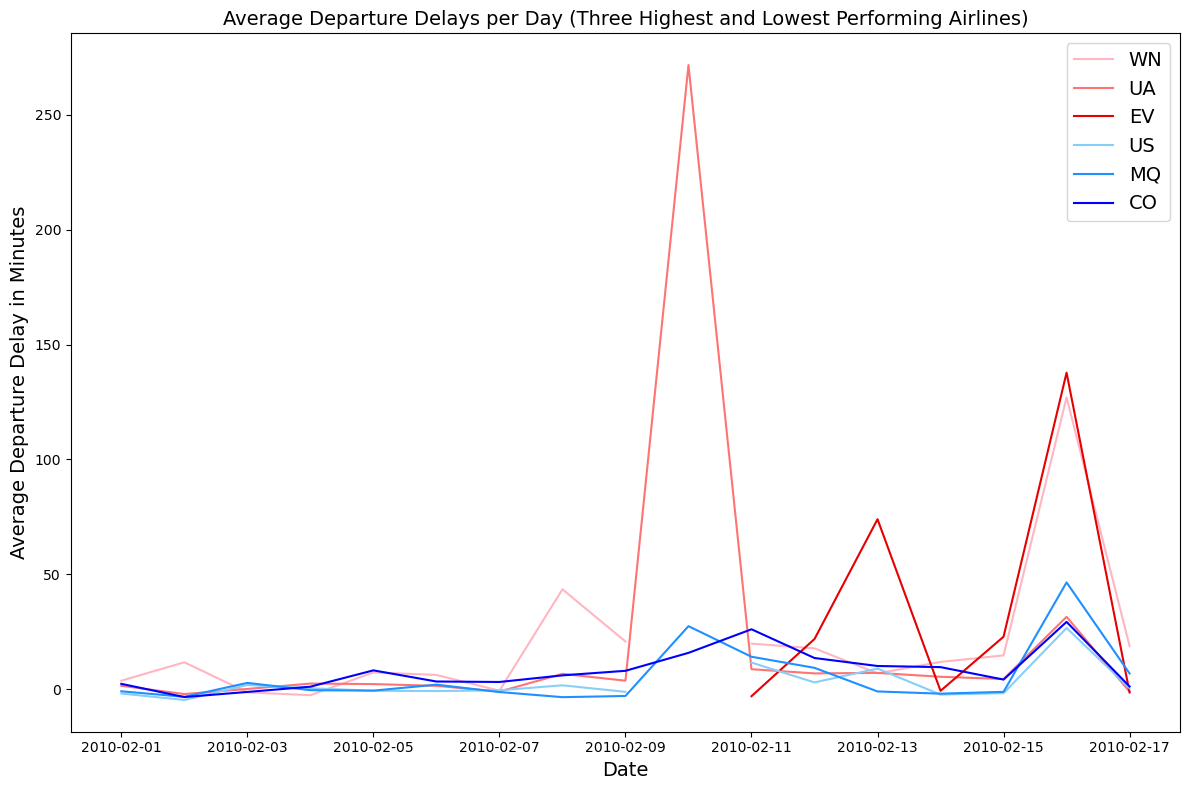

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df contains your DataFrame with the given snippet of data

# Convert 'flight_date' to datetime format
flights_filtered['flight_date'] = pd.to_datetime(flights_filtered['flight_date'])

# Group by 'flight_date' and 'airline', then calculate the mean departure delay per date for each airline
dep_delay_mean = flights_filtered.groupby(['flight_date', 'airline'])['dep_delay'].mean().reset_index()

# Calculate total departure delays per airline
total_dep_delay = dep_delay_mean.groupby('airline')['dep_delay'].mean().reset_index()

# Sort by total departure delays
total_dep_delay_sorted = total_dep_delay.sort_values(by='dep_delay')

# Get top 3 and bottom 3 airlines by total departure delays
top_3_airlines = total_dep_delay_sorted.tail(3)['airline']
bottom_3_airlines = total_dep_delay_sorted.head(3)['airline']

# Filter departure delays DataFrame for top 3 and bottom 3 airlines
top_3_dep_delay = dep_delay_mean[dep_delay_mean['airline'].isin(top_3_airlines)]
bottom_3_dep_delay = dep_delay_mean[dep_delay_mean['airline'].isin(bottom_3_airlines)]

# Define custom colors for each airline
top_colors = ['#FFB6C1', '#FF7373', '#E60000']  # Customize as needed
bottom_colors = ['#87CEFA', '#1E90FF', '#0000FF']  # Blue shades

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot for top 3 airlines with custom colors
for i, airline in enumerate(top_3_airlines):
    data = top_3_dep_delay[top_3_dep_delay['airline'] == airline]
    ax.plot(data['flight_date'], data['dep_delay'], label=airline, color=top_colors[i])

# Plot for bottom 3 airlines with custom colors
for i, airline in enumerate(bottom_3_airlines):
    data = bottom_3_dep_delay[bottom_3_dep_delay['airline'] == airline]
    ax.plot(data['flight_date'], data['dep_delay'], label=airline, color=bottom_colors[i])

ax.set_title('Average Departure Delays per Day (Three Highest and Lowest Performing Airlines)', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Average Departure Delay in Minutes', fontsize=14)
ax.legend(fontsize=14)

plt.tight_layout()
plt.show()


In [37]:
import pandas as pd

# Define the list of airports to include
selected_airports = ['IAG', 'BWI', 'PHL', 'EWR', 'JFK', 'LGA']

# Group by 'airline' and 'origin' columns, then count the occurrences of each airport for departure
departure_counts = flights.groupby(['airline', 'origin']).size().reset_index(name='departure_count')

# Filter departure counts for selected airports
departure_counts_selected = departure_counts[departure_counts['origin'].isin(selected_airports)]

# Find the three most used departure airports for each airline
most_used_departure = departure_counts_selected.groupby('airline').apply(lambda x: x.nlargest(3, 'departure_count')).reset_index(drop=True)

# Group by 'airline' and 'dest' columns, then count the occurrences of each airport for arrival
arrival_counts = flights.groupby(['airline', 'dest']).size().reset_index(name='arrival_count')

# Filter arrival counts for selected airports
arrival_counts_selected = arrival_counts[arrival_counts['dest'].isin(selected_airports)]

# Find the three most used arrival airports for each airline
most_used_arrival = arrival_counts_selected.groupby('airline').apply(lambda x: x.nlargest(3, 'arrival_count')).reset_index(drop=True)

# Merge the most used departure and arrival airports into a single DataFrame
most_used_airports = pd.merge(most_used_departure, most_used_arrival, on='airline', suffixes=('_departure', '_arrival'))

# Calculate the total number of flights for each airline
total_flights = flights.groupby('airline').size().reset_index(name='total_flights')

# Merge total number of flights with most used airports
most_used_airports = pd.merge(most_used_airports, total_flights, on='airline')

# Select columns for the final table
most_used_airports = most_used_airports[['airline', 'origin', 'dest', 'total_flights']]



In [81]:
most_used_airports[most_used_airports['airline']=='AA']

,airline,origin,dest,total_flights
4,AA,LGA,LGA,5066
5,AA,LGA,JFK,5066
6,AA,LGA,EWR,5066
7,AA,JFK,LGA,5066
8,AA,JFK,JFK,5066
9,AA,JFK,EWR,5066
10,AA,EWR,LGA,5066
11,AA,EWR,JFK,5066
12,AA,EWR,EWR,5066


In [10]:
pip install basemap

Note: you may need to restart the kernel to use updated packages.


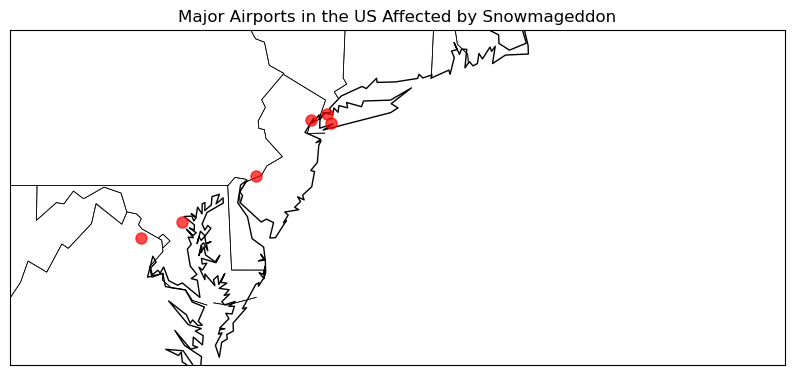

In [11]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# Define airport coordinates
airport_coordinates = {
    'IAD': (38.9445, -77.4558),
    'BWI': (39.1774, -76.6684),
    'PHL': (39.8721, -75.2431),
    'EWR': (40.6895, -74.1745),
    'JFK': (40.6413, -73.7781),
    'LGA': (40.7769, -73.874)
}

# Create a map
plt.figure(figsize=(10, 6))
map = Basemap(projection='merc', llcrnrlat=37, urcrnrlat=42, llcrnrlon=-80, urcrnrlon=-65, resolution='l')

# Draw coastlines, countries, and states
map.drawcoastlines()
map.drawcountries()
map.drawstates()

# Plot airports
for lat, lon in airport_coordinates.values():
    x, y = map(lon, lat)
    map.plot(x, y, 'ro', markersize=8, alpha=0.7)  # Adjust alpha for transparency and use a darker red color
    
# Add title
plt.title('Major Airports in the US Affected by Snowmageddon')

# Show the map
plt.show()


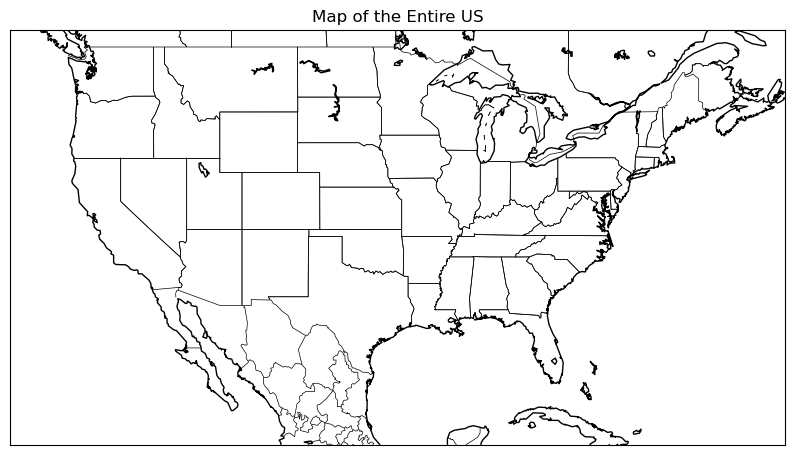

In [12]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# Create a map
plt.figure(figsize=(10, 6))
map = Basemap(projection='merc', llcrnrlat=20, urcrnrlat=50, llcrnrlon=-130, urcrnrlon=-60, resolution='l')

# Draw coastlines, countries, and states
map.drawcoastlines()
map.drawcountries()
map.drawstates()

# Add title
plt.title('Map of the Entire US')

# Show the map
plt.show()

